In [1]:
import numpy as np
import scipy as sc
from scipy.special import sph_harm, lpmv, legendre
import math
import matplotlib.pyplot as plt
import scipy.integrate as sci

import matplotlib.gridspec as gridspec
# The following import configures Matplotlib for 3D plotting.
from mpl_toolkits.mplot3d import Axes3D
plt.rc('text', usetex=True)

In [2]:
def norm(wf, r_grid, theta_grid, phi_grid):
        prob_den = abs(wf)**2
        integrand = prob_den*(r_grid**2)*np.sin(phi_grid)
        integration = sci.simps(sci.simps(sci.simps(integrand, r_grid), theta_grid), phi_grid)
        norm = 1/np.sqrt(integration)
        return norm

In [3]:
def plot_sph_harm(l,m,theta_grid, phi_grid):
    theta, phi = np.meshgrid(theta_grid, phi_grid)
    # Calculate the Cartesian coordinates of each point in the mesh.
    xyz = np.array([np.sin(phi) * np.sin(theta),
                    np.sin(phi) * np.cos(theta),
                    np.cos(phi)])

    def plot_Y(ax, el, m):
            """Plot the spherical harmonic of degree el and order m on Axes ax."""

            Y = spherical_harmonics(l,m,theta, phi)
            
            Yx, Yy, Yz = np.abs(Y) * xyz

            # Colour the plotted surface according to the sign of Y.
            cmap = plt.cm.ScalarMappable(cmap=plt.get_cmap('PRGn'))
            cmap.set_clim(-0.5, 0.5)

            ax.plot_surface(Yx, Yy, Yz,
                            facecolors=cmap.to_rgba(Y.real),
                            rstride=2, cstride=2)

            # Draw a set of x, y, z axes for reference.
            ax_lim = 0.5
            ax.plot([-ax_lim, ax_lim], [0,0], [0,0], c='0.5', lw=1, zorder=10)
            ax.plot([0,0], [-ax_lim, ax_lim], [0,0], c='0.5', lw=1, zorder=10)
            ax.plot([0,0], [0,0], [-ax_lim, ax_lim], c='0.5', lw=1, zorder=10)
            # Set the Axes limits and title, turn off the Axes frame.
            ax.set_title(r'$Y_{{{},{}}}$'.format(el, m))
            ax_lim = 0.5
            ax.set_xlim(-ax_lim, ax_lim)
            ax.set_ylim(-ax_lim, ax_lim)
            ax.set_zlim(-ax_lim, ax_lim)
            ax.axis('off')

    fig = plt.figure(figsize=plt.figaspect(1.))
    ax = fig.add_subplot(projection='3d')
    plot_Y(ax, l, m)
    plt.savefig('Y{}_{}.png'.format(l, m))
    plt.show()

In [4]:
# The theta and phi are exchanged due to "scipy.special.sph_harm implementation"
def spherical_harmonics(l, m, theta, phi):
    """Calculate spherical harmonics Y(l, m) for given angles."""
    Y = sph_harm(abs(m), l, theta, phi)
    # Linear combination of Y_l,m and Y_l,-m to create the real form.
    if m < 0:
        Y = np.sqrt(2) * (-1)**m * Y.imag
    elif m > 0:
        Y = np.sqrt(2) * (-1)**m * Y.real
    else:
        Y = sph_harm(0,l,theta,phi)
    return Y

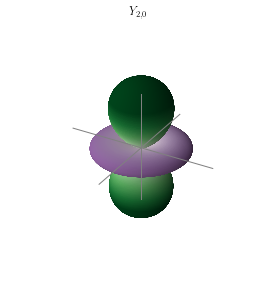

In [5]:
# The theta and phi are exchanged due to "scipy.special.sph_harm implementation"
a0 = 1  # Bohr radius in atomic unit
n = 3
l = 2
m = 0
r_grid = np.linspace(0, 10, 1000)
theta_grid = np.linspace(0,2*np.pi,1000)    # thousand points in between 0 to 2*pi
phi_grid = np.linspace(0,np.pi, 1000)
plot_sph_harm(l,m,theta_grid, phi_grid)